## NYC Service Request Analysis
### Laxman Parab

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
data = pd.read_csv(r'311_Service_Requests_from_2010_to_Present.csv')

In [4]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
#Looking at each column's name and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
#Convert 'Created Date' and 'Closed Date' to datetime.
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']

In [7]:
#Number of rows and columns 
data.shape

(300698, 54)

In [8]:
#Checking for missing values
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [9]:
#Deleting the columns with almost all missing values.
data = data.drop(["School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Garage Lot Name","Ferry Direction","Ferry Terminal Name"],axis = 1)

In [10]:
#Filling the City column with 'Unknown City' instead of dropping the records with missing Cities
data['City'].fillna('Unknown City', inplace =True)

In [11]:
data.shape

(300698, 47)

In [12]:
#Descriptor is the compliant type label.
data['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [13]:
#What are the types of complaint made?
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [14]:
#How many types of complaints are made?
data['Complaint Type'].nunique()

24

In [15]:

complaint = data['Complaint Type'].value_counts()
complaint_df = complaint.to_frame()
complaint_df = complaint_df.rename(columns = {'Complaint Type':'Counts'})
complaint_df

,Counts
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


<AxesSubplot:xlabel='count', ylabel='Complaint Type'>

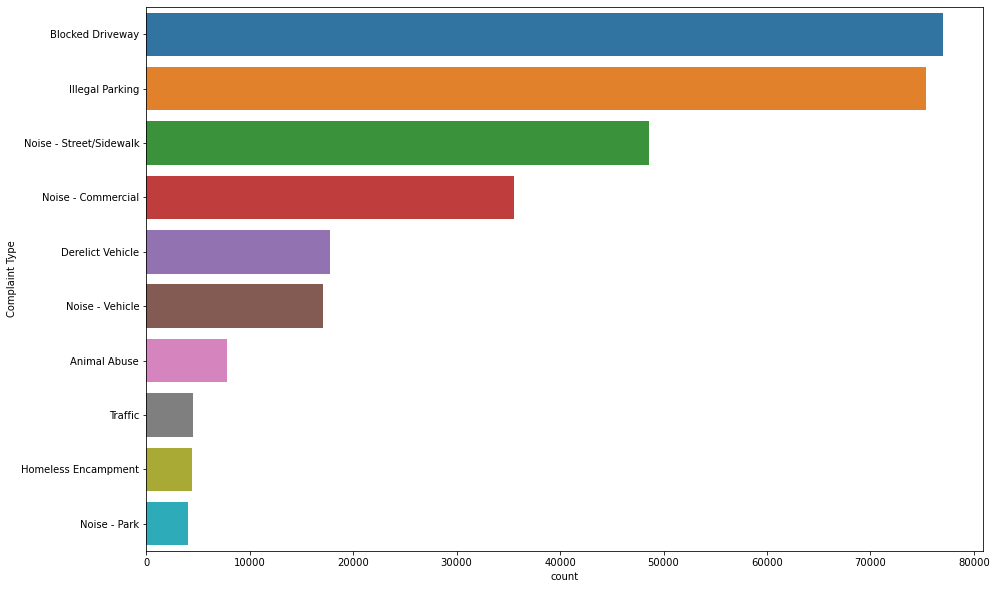

In [16]:
#Which type of complaint is maximum?
plt.figure(figsize = (15,10))
sns.countplot(y ='Complaint Type',data = data,order = data['Complaint Type'].value_counts().iloc[:10].index) 

In [17]:
#We can see that most of the compliant types are of 'Blocked Driveway' followed by 'Illegal Parking' and so on.

<AxesSubplot:>

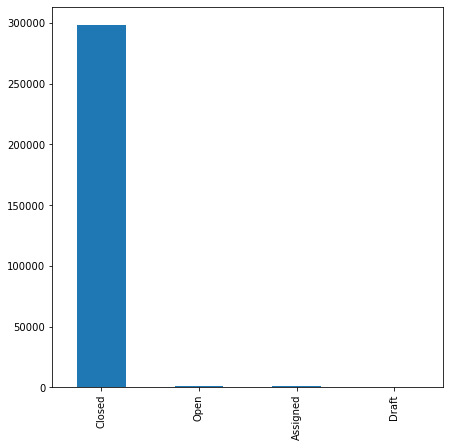

In [18]:
#What is the satatus of the tickets?
plt.figure(figsize = (7,7))
data['Status'].value_counts().plot(kind ='bar')

In [19]:
#Most of the cases are closed which is a good sign for NYC 311

<AxesSubplot:xlabel='count', ylabel='Location Type'>

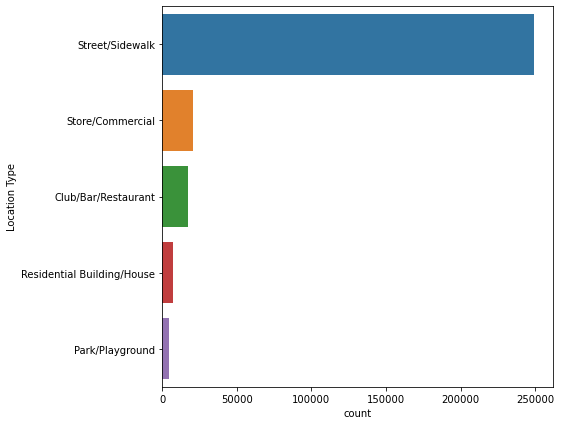

In [20]:
plt.figure(figsize = (7,7))
sns.countplot(y ='Location Type',data = data,order = data['Location Type'].value_counts().iloc[:5].index) 

In [21]:
#Most of the complaints are from Streets/Sidewalks.

<AxesSubplot:xlabel='count', ylabel='Descriptor'>

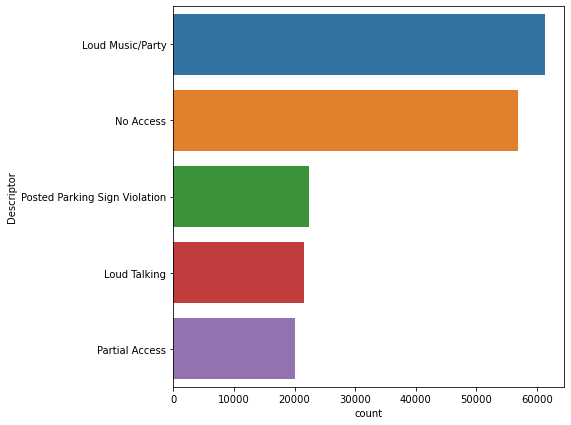

In [22]:
plt.figure(figsize = (7,7))
sns.countplot(y ='Descriptor',data = data,order = data['Descriptor'].value_counts().iloc[:5].index) 

In [23]:
#Loud music/Party are one of the biggest problems for the people.

<AxesSubplot:xlabel='count', ylabel='City'>

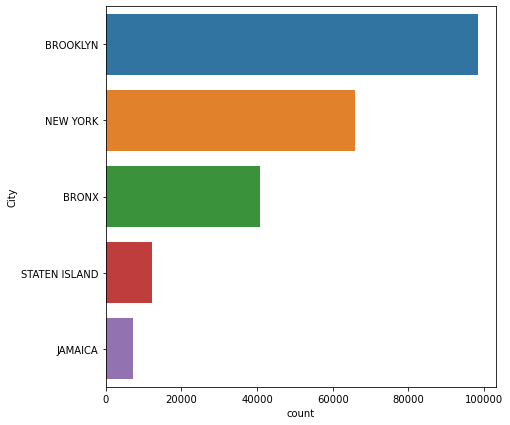

In [24]:
plt.figure(figsize = (7,7))
sns.countplot(y ='City',data = data,order = data['City'].value_counts().iloc[:5].index)

In [25]:
#Brooklyn has the highest number of callers i.e. they have many problems.

In [26]:
#Creating a new colmun of 'Request_Closing _Time' in hours
data_2 = data[['City','Complaint Type','Request_Closing_Time']]
data_2.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)
data_2['rct_hr'] = np.around((data_2['Request_Closing_Time'].astype(np.int64)/(pow(10,9)*3600)),decimals=2)

In [27]:
data_2.head()

,City,Complaint Type,Request_Closing_Time,rct_hr
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86
3,BRONX,Illegal Parking,0 days 07:45:14,7.75
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45


In [28]:
avg_time = np.around((data_2['rct_hr'].mean()),decimals=2)
avg_time

4.31

In [29]:
#Ordering the complaint types based on the average ‘Request_Closing_Time’
complaint_group = data_2.groupby(['City','Complaint Type']).agg({'rct_hr':'mean'})
complaint_group = complaint_group.sort_values(['City','rct_hr'])

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
complaint_group

rct_hr
City                Complaint Type                       
ARVERNE             Drinking                     0.240000
                    Vending                      0.480000
                    Urinating in Public          0.690000
                    Panhandling                  1.030000
                    Noise - Park                 1.285000
                    Graffiti                     1.530000
                    Noise - House of Worship     1.562727
                    Homeless Encampment          1.812500
                    Noise - Vehicle              1.860000
                    Noise - Street/Sidewalk      1.992759
                    Animal Abuse                 2.153158
                    Noise - Commercial           2.285000
                    Illegal Parking              2.316207
                    Blocked Driveway             2.526286
                    Derelict Vehicle             2.968519
                    Disorderly Youth             3.595000
ASTORIA             Panhandling                  1.150000
                    Bike/Roller/Skate Chronic    1.740667
                    Noise - House of Worship     2.022632
                    Illegal Fireworks            2.772500
                    Disorderly Youth             2.903333
                    Noise - Park                 2.994754
                    Noise - Commercial           3.133039
                    Noise - Street/Sidewalk      3.450881
                    Noise - Vehicle              3.509020
                    Urinating in Public          4.626667
                    Drinking                     4.722571
                    Blocked Driveway             4.816108
                    Illegal Parking              4.833371
                    Homeless Encampment          4.918750
                    Vending                      4.935556
                    Animal Abuse                 5.000640
                    Traffic                      5.410851
                    Posting Advertisement        5.870000
                    Derelict Vehicle             9.689145
                    Graffiti                    14.097500
Astoria             Noise - Commercial           3.542069
                    Noise - Street/Sidewalk      3.713333
                    Illegal Parking              4.711362
                    Blocked Driveway             4.915172
                    Derelict Vehicle             6.234167
BAYSIDE             Traffic                      1.526667
                    Noise - Street/Sidewalk      1.530667
                    Noise - Vehicle              1.709375
                    Vending                      1.880000
                    Drinking                     1.900000
                    Noise - Commercial           2.234500
                    Illegal Parking              2.562763
                    Blocked Driveway             2.562997
                    Homeless Encampment          2.875000
                    Disorderly Youth             2.970000
                    Animal Abuse                 3.274865
                    Noise - Park                 3.275000
                    Derelict Vehicle             3.360000
                    Noise - House of Worship     3.535000
                    Graffiti                     4.553333
BELLEROSE           Noise - Park                 1.410000
                    Disorderly Youth             1.850000
                    Noise - House of Worship     2.200000
                    Posting Advertisement        2.260000
                    Noise - Vehicle              2.584000
                    Drinking                     3.920000
                    Bike/Roller/Skate Chronic    4.900000
                    Traffic                      5.760000
                    Illegal Fireworks            6.670000
                    Noise - Commercial           6.740811
                    Panhandling                  7.480000
                    Urinating in Public          

In [31]:
import scipy.stats as stat

In [32]:
#Are the type of complaint or service requested and location related?

In [33]:
data_3 = data[['Complaint Type','City']]
data_3 = data_3.dropna()

In [34]:
citycomp = pd.crosstab(data_3['Complaint Type'], data_3['City'])
citycomp.head()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,28,61,59,38,0,89,2,143,45,45,5,33,31,0,42,229,19,15,30,0,36,22,1,1525,19,48,0,66,26,32,117,30,33,30,55,26,24,557,35,11,28,45,69,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,0,0,1,2,0,0,0,3,5,0,0,0,1,0,2,2,0,0,3,0,1,1,0,225,2,1,0,0,0,0,3,0,2,0,1,1,0,7,2,5,4,2,4,0
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,435,2761,1408,1446,0,284,20,2795,663,503,30,342,167,1,568,2818,313,121,772,34,732,457,53,2072,132,1259,2,585,611,872,1694,70,211,244,942,1548,262,2142,206,283,208,1060,1613,11


In [35]:
#Applying ANOVA for some combinations.

In [36]:
f_val,p_val = stat.f_oneway(citycomp['ARVERNE'],citycomp['ASTORIA'])

In [37]:
print('F-statistic is ',round(f_val,2))
print('p-value is ',round(p_val,2))

F-statistic is  4.29
p-value is  0.04


In [38]:
f_val,p_val = stat.f_oneway(citycomp['ARVERNE'],citycomp['BROOKLYN'])

In [39]:
print('F-statistic is ',round(f_val,2))
print('p-value is ',round(p_val,2))

F-statistic is  6.07
p-value is  0.02


In [40]:
#p-value is around 0.05 lets conduct chi-square contingency test

In [41]:
#Null hypothesis: There is no relationship between the complaint and city
#v/s Alternate hypothesis: There is relationship between complaint and city

In [42]:
chi2, p_val, df, exp_frq = stat.chi2_contingency(citycomp)

In [43]:
chi2

121788.33122567515

In [44]:
p_val

0.0

In [45]:
#Since p-value is less than 0.05 we reject null hypothesis and conclude
#that complaint or service request and location are related